In [1]:
from matplotlib import pyplot as plt
from CRFluxModels import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

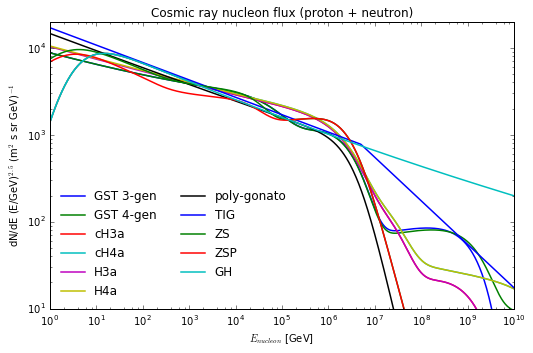

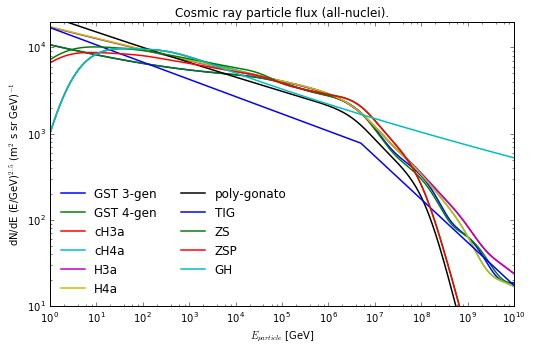

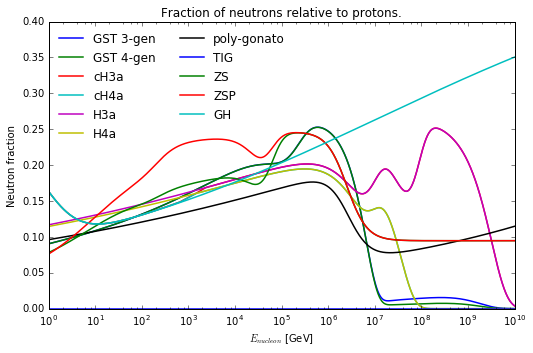

In [7]:
pmodels = [(GaisserStanevTilav, "3-gen", "GST 3-gen"),
           (GaisserStanevTilav, "4-gen", "GST 4-gen"),
           (CombinedGHandHG, "H3a", "cH3a"),
           (CombinedGHandHG, "H4a", "cH4a"),
           (HillasGaisser2012, "H3a", "H3a"),
           (HillasGaisser2012, "H4a", "H4a"),
           (PolyGonato, False, "poly-gonato"),
           (Thunman, None, "TIG"),
           (ZatsepinSokolskaya, 'default', 'ZS'),
           (ZatsepinSokolskaya, 'pamela', 'ZSP'),
           (GaisserHonda, None, 'GH')]

nfrac = {}
evec = np.logspace(0, 10, 1000)
plt.figure(figsize=(7.5, 5))
plt.title('Cosmic ray nucleon flux (proton + neutron)')
for mclass, moptions, mtitle in pmodels:
    pmod = mclass(moptions)
    pfrac, p, n = pmod.p_and_n_flux(evec)
    plt.plot(evec, (p + n) * evec ** 2.5, ls='-', lw=1.5, label=mtitle)
    nfrac[mtitle] = (1 - pfrac)

plt.loglog()
plt.xlabel(r"$E_{nucleon}$ [GeV]")
plt.ylabel(r"dN/dE (E/GeV)$^{2.5}$ (m$^{2}$ s sr GeV)$^{-1}$")
plt.legend(loc=0, frameon=False, numpoints=1, ncol=2)
plt.xlim([1, 1e10])
plt.ylim([10, 2e4])
plt.tight_layout()

plt.figure(figsize=(7.5, 5))
plt.title('Cosmic ray particle flux (all-nuclei).')

for mclass, moptions, mtitle in pmodels:
    pmod = mclass(moptions)
    flux = pmod.total_flux(evec)
    plt.plot(evec, flux * evec ** 2.5, ls='-', lw=1.5, label=mtitle)

plt.loglog()
plt.xlabel(r"$E_{particle}$ [GeV]")
plt.ylabel(r"dN/dE (E/GeV)$^{2.5}$ (m$^{2}$ s sr GeV)$^{-1}$")
plt.legend(loc=0, frameon=False, numpoints=1, ncol=2)
plt.xlim([1, 1e10])
plt.ylim([10, 2e4])
plt.tight_layout()

plt.figure(figsize=(7.5, 5))
plt.title('Fraction of neutrons relative to protons.')
for mclass, moptions, mtitle in pmodels:
    plt.plot(evec, nfrac[mtitle], ls='-', lw=1.5, label=mtitle)

plt.semilogx()
plt.xlabel(r"$E_{nucleon}$ [GeV]")
plt.ylabel("Neutron fraction")
plt.legend(loc=0, frameon=False, numpoints=1, ncol=2)
plt.xlim([1, 1e10])
plt.tight_layout()
plt.show()